In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Users/billhuang/Library/Fonts/NotoSansCJK-Black.ttc')
import numpy as np
import pandas as pd

In [4]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [5]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
5,106,006,006032,國立政治大學,哲學系,2,藝術及人文,政大,哲學
6,106,006,006262,國立政治大學,英國語文學系,2,藝術及人文,政大,英國語文
7,106,006,006292,國立政治大學,日本語文學系,2,藝術及人文,政大,日本語文
8,106,006,006272,國立政治大學,阿拉伯語文學系,2,藝術及人文,政大,阿拉伯語文
9,106,006,006302,國立政治大學,韓國語文學系,2,藝術及人文,政大,韓國語文


## Q1 Data Preparation

In [6]:
total = stu_adm.shape[0]
while True:
    all_depid = stu_adm['department_id'].unique()
    value_count = stu_adm.department_id.value_counts()
    for i in all_depid:
        if value_count[i] < 10:
            all_depid = np.delete(all_depid, [np.where(all_depid == i)[0]])
            stu_adm = stu_adm[stu_adm.department_id != i]
            
    all_stuid = stu_adm['student_id'].unique()
    value_count_stu = stu_adm.student_id.value_counts()
    for i in all_stuid:
        if value_count_stu[i] < 2:
            all_stuid = np.delete(all_stuid, [np.where(all_stuid == i)[0]])
            stu_adm = stu_adm[stu_adm.student_id != i]
    if total == stu_adm.shape[0]:
        break
    total = stu_adm.shape[0]

In [7]:
ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
matrix = pd.DataFrame(np.zeros(shape = [ndepid, nstuid]), index = all_depid.astype(str), columns = all_stuid.astype(str))

In [ ]:
stu_adm = stu_adm.reset_index(drop = True)

In [8]:
ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print(ndepid, nstuid)

1917 47386


In [ ]:
for i in range(stu_adm.shape[0]):
    matrix[str(stu_adm['student_id'][i])][str(stu_adm['department_id'][i])] = 1

### Q1-1

In [249]:
print("There are %d students and %d departments in total after processing." % (nstuid, ndepid))

There are 47386 students and 1917 departments in total after processing.


### Q1-2

In [316]:
res = stu_adm.department_id.value_counts()[:11]
df = pd.DataFrame({'department_id': res.index, 'department_name' : '0', 'number of applications':res.values})

In [ ]:
for i in range(df.shape[0]):
    df.department_name[i] = getDepName(df.department_id[i])

In [332]:
def getDepName(id):
    name = uname[uname.department_id == id]['school_name'].values + uname[uname.department_id == id]['department_name'].values
    return name[0]

In [339]:
print("The top ten departments that recieved the most applications' information is shown below.\n")
df

The top ten departments that recieved the most applications' information is shown below.



,department_id,department_name,number of applications
0,008122,中原大學機械工程學系,386
1,012052,中國醫藥大學藥學系,376
2,046032,銘傳大學會計學系（臺北校區）,367
3,004382,國立成功大學電機工程學系,357
4,008112,中原大學土木工程學系,353
5,005192,東吳大學企業管理學系,353
6,005182,東吳大學會計學系,351
7,015342,逢甲大學財務金融學系,340
8,045012,義守大學電機工程學系,339
9,015222,逢甲大學資訊工程學系,329


## Q2 Explore

## Q2-1 

In [343]:
X = np.array(matrix)

In [344]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_reduce = pca.fit_transform(X)

In [445]:
def getDepCat(id):
    return uname[uname.department_id == id]['category_name'].values[0]

In [601]:
color = {'教育':'red', '藝術及人文':'chocolate', '社會科學、新聞學及圖書資訊':'greenyellow', '商業、管理及法律':'gold', '自然科學、數學及統計':'hotpink', '資訊通訊科技':'cyan', '工程、製造及營建':'violet', '農業、林業、漁業及獸醫':'palegreen', '醫藥衛生及社會福利':'blue', '服務':'azure', '其他':'deeppink'}
cate = np.array([getDepCat(i) for i in matrix.index])
# for i in range(X_reduce.shape[1]):
#     for j in range(i+1, X_reduce.shape[1]):
#         for c in np.unique(cate):
#             xs = np.where(cate == c)
#             plt.scatter(X_reduce[xs,i], X_reduce[xs,j], c = color[c], s = 5)
#         plt.xlabel("principle component"+str(i+1))
#         plt.ylabel("principle component"+str(j+1))
#         plt.legend(color, prop = myfont)
#         plt.show()

In [ ]:
def getDepCat(id):
    return uname[uname.department_id == id]['category_id'].values[0]
color = {'1':'red', '2':'chocolate', '3':'greenyellow', '4':'gold', '5':'hotpink', '6':'cyan', '7':'violet', '8':'palegreen', '9':'blue', '10':'lime', '99':'deeppink',}
cate = np.array([getDepCat(i) for i in matrix.index])
for i in range(X_reduce.shape[1]):
    for j in range(i+1, X_reduce.shape[1]):
        for c in np.unique(cate):
            xs = np.where(cate == c)
            plt.scatter(X_reduce[xs,i], X_reduce[xs,j], c = color[c])
        plt.xlabel("principle component"+str(i+1))
        plt.ylabel("principle component"+str(j+1))
        plt.show()

### Q2-1

Text(0.5, 1.0, 'PCA')

<Figure size 432x288 with 0 Axes>

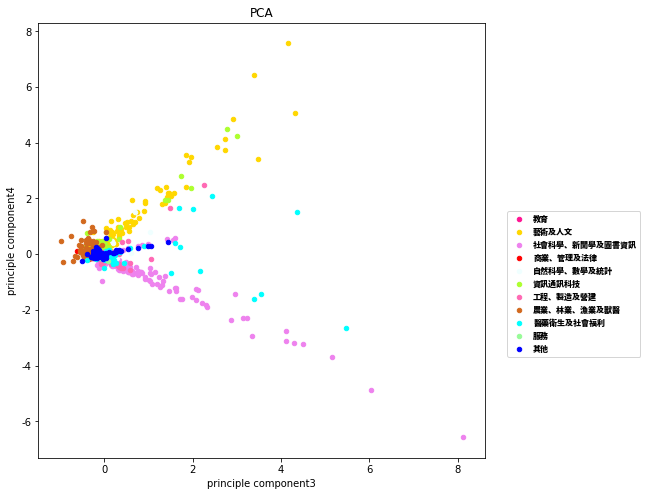

In [584]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(8,8))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(X_reduce[xs,2], X_reduce[xs,3], c = color[c], s = 20)
ax.set_xlabel("principle component"+str(2+1))
ax.set_ylabel("principle component"+str(3+1))
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.2, 0.4))
ax.set_title("PCA")

Text(0.5, 1.0, 'PCA')

<Figure size 432x288 with 0 Axes>

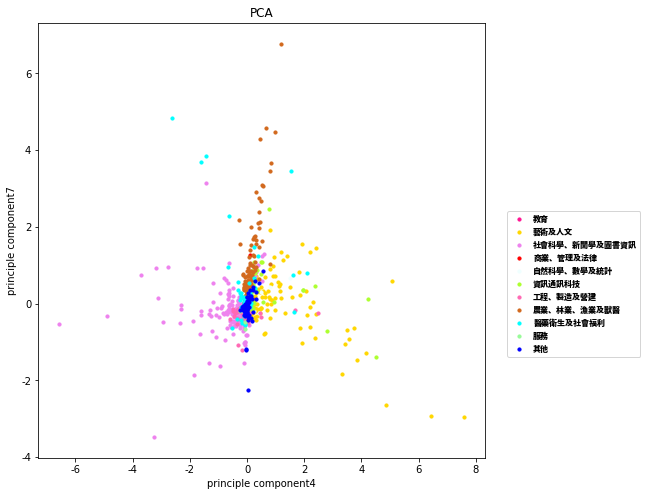

In [577]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(8,8))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(X_reduce[xs,3], X_reduce[xs,6], c = color[c], s = 10)
ax.set_xlabel("principle component"+str(3+1), )
ax.set_ylabel("principle component"+str(6+1))
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.2, 0.4))
ax.set_title("PCA")

#### Explanation:

在8個 PC 中倆倆分別畫了28張圖後，我選擇了兩個相對比較能夠將系所類別分開的圖。<br><br>第3, 4個 PC：可以分出；社會科學、新聞學及圖書資訊；藝術與人文；農業、林業、漁業及獸醫等類別。其中，農業、林業、漁業及獸醫這個類別聚集在(PC 3, PC 4) = (0, 0)的地方<br><br>第4, 7個 PC：可以分出社會科學、新聞學及圖書資訊；藝術與人文；資訊通訊科技等類別。其中，社會科學、新聞學及圖書資訊主要聚集在PC 4 < 0, PC 7 < 2的區域，藝術與人文則聚集在PC 4 > 0, PC 7 < 2的區域。

### Q2-2

In [ ]:
from sklearn.manifold import MDS
mds = MDS()
mds_reduce = mds.fit_transform(matrix)

Text(0.5, 1.0, 'Metric MDS')

<Figure size 432x288 with 0 Axes>

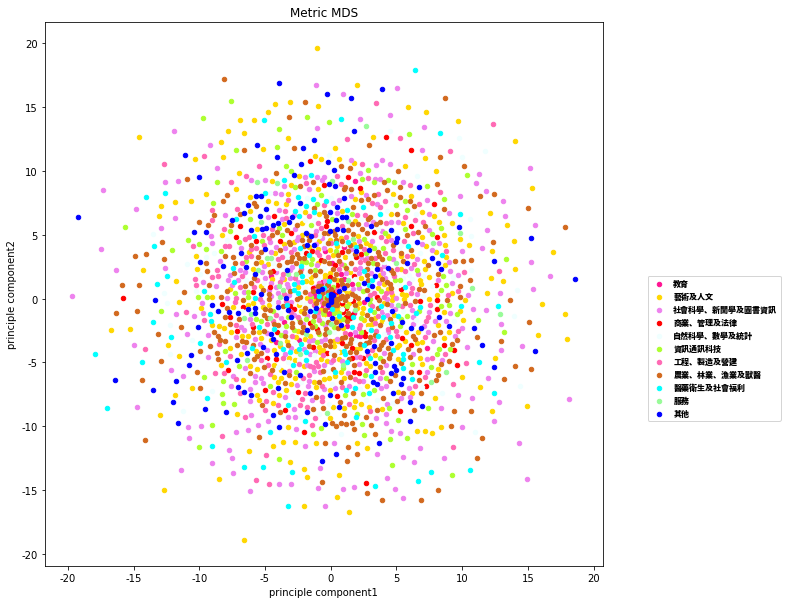

In [594]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(mds_reduce[xs,0], mds_reduce[xs,1], c = color[c], s = 20)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.2, 0.4))
ax.set_title("Metric MDS")

Text(0.5, 1.0, 'non-metric MDS')

<Figure size 432x288 with 0 Axes>

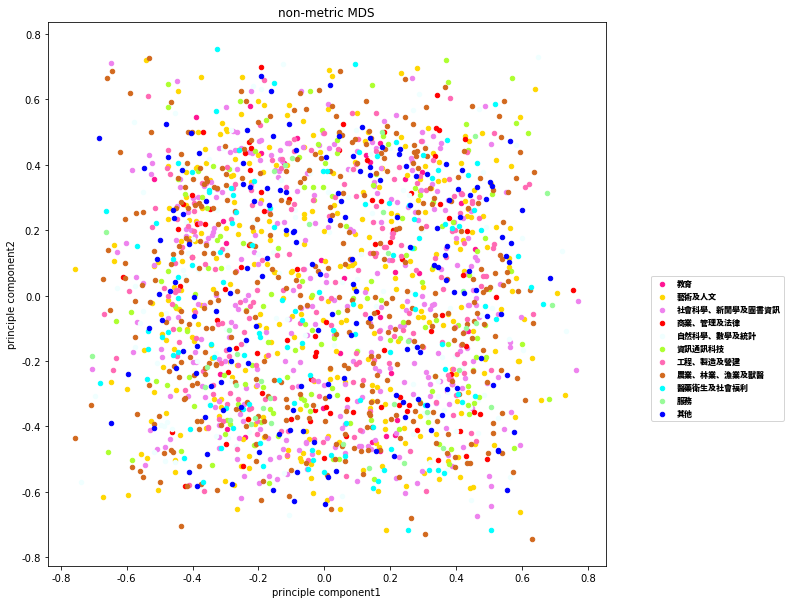

In [595]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(mds_n_reduce[xs,0], mds_n_reduce[xs,1], c = color[c], s = 20)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.2, 0.4))
ax.set_title("non-metric MDS")

#### Explanation:

metric & non-metric MDS都沒有辦法明顯地將類別分成一群一群的，而是凌亂的散佈在圖上，所以才會看起來像隨機噴墨出來的結果。

### Q2-3

(1)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors = 20)
lle_reduce = lle.fit_transform(matrix)

Text(0.5, 1.0, 'Locally Linear Embedding with 20 neighbors')

<Figure size 432x288 with 0 Axes>

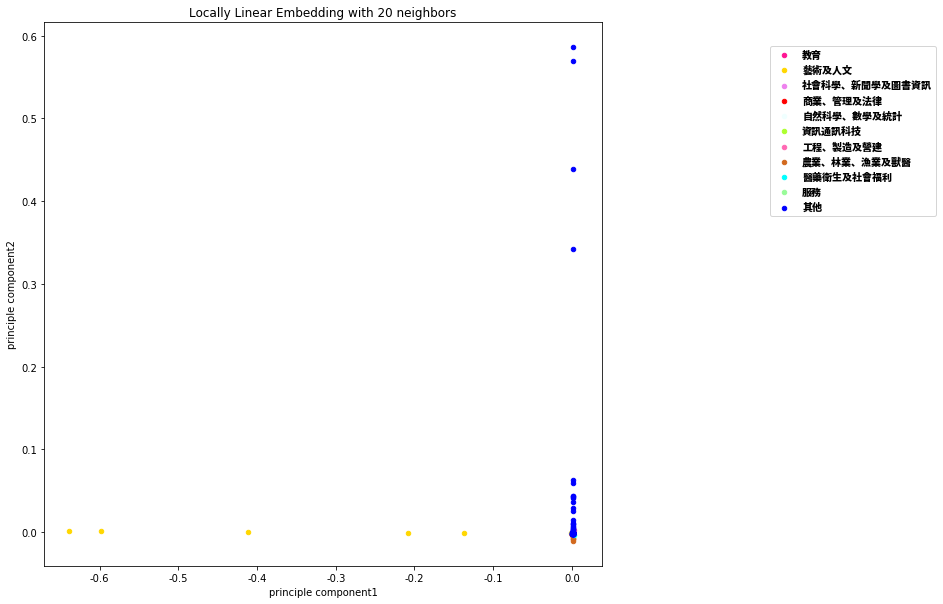

In [513]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(lle_reduce[xs,0], lle_reduce[xs,1], c = color[c], s = 20)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("Locally Linear Embedding with 20 neighbors")

(2)

In [ ]:
lle2 = LocallyLinearEmbedding(n_neighbors = 40)
lle2_reduce = lle2.fit_transform(matrix)

Text(0.5, 1.0, 'Locally Linear Embedding with 40 neighbors')

<Figure size 432x288 with 0 Axes>

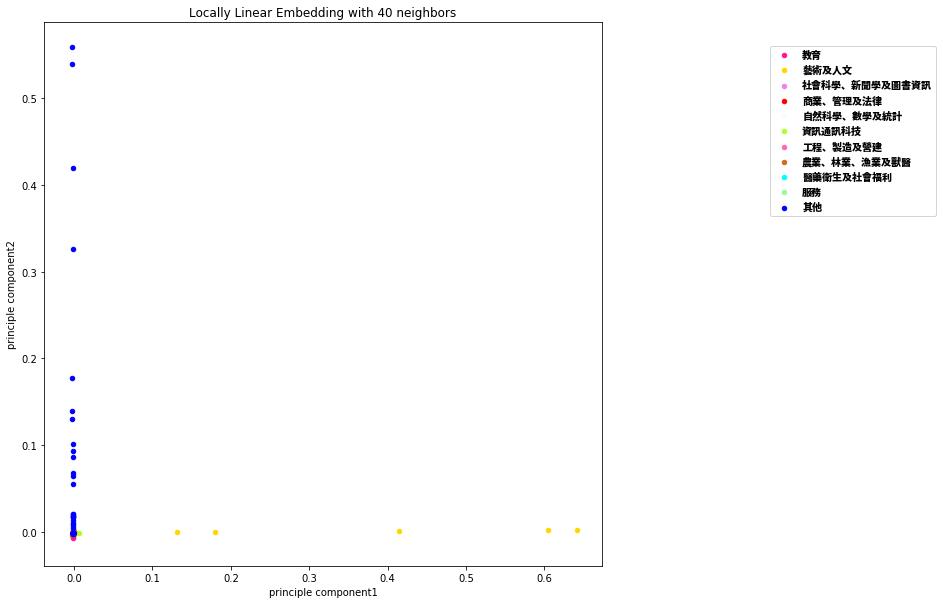

In [512]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(lle2_reduce[xs,0], lle2_reduce[xs,1], c = color[c], s = 20)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("Locally Linear Embedding with 40 neighbors")

(3)

In [ ]:
pca2 = PCA(n_components = 100)
pca_reduce = pca2.fit_transform(matrix)
lle3_reduce = lle.fit_transform(pca_reduce)

Text(0.5, 1.0, 'Locally Linear Embedding using the first 100 PCs with 20 neighbors')

<Figure size 432x288 with 0 Axes>

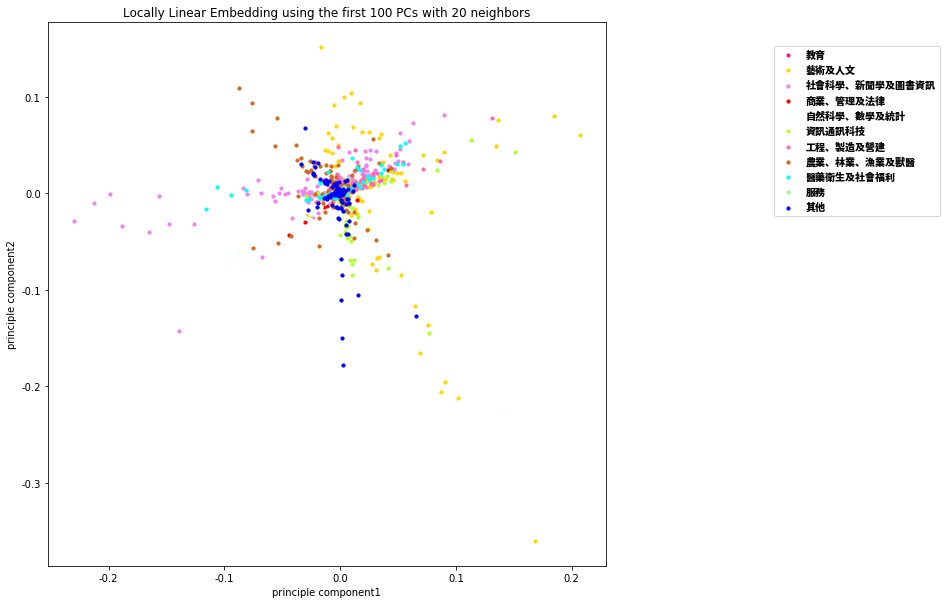

In [511]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(lle3_reduce[xs,0], lle3_reduce[xs,1], c = color[c], s = 10)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("Locally Linear Embedding using the first 100 PCs with 20 neighbors")

#### Explanation:

neighbors = 20, 40都無法有效的分群，藝術與人文與其他這兩個類別分別分佈在PC 1 = 0與PC 2 = 0，所以呈現出水平線、垂直線的分佈，其餘的點都集中在(PC1, PC2) = (0,0)的地方，可見這些資料不適合使用 LLE 做 visualization。(3)的作法就明顯比前兩個好，可以區別出社會科學、新聞學及圖書資訊；藝術與人文；資訊通訊科技等類別。

### Q2-4

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
kpca_reduce = kpca.fit_transform(matrix)

Text(0.5, 1.0, 'Kernel PCA with the RBF kernel')

<Figure size 432x288 with 0 Axes>

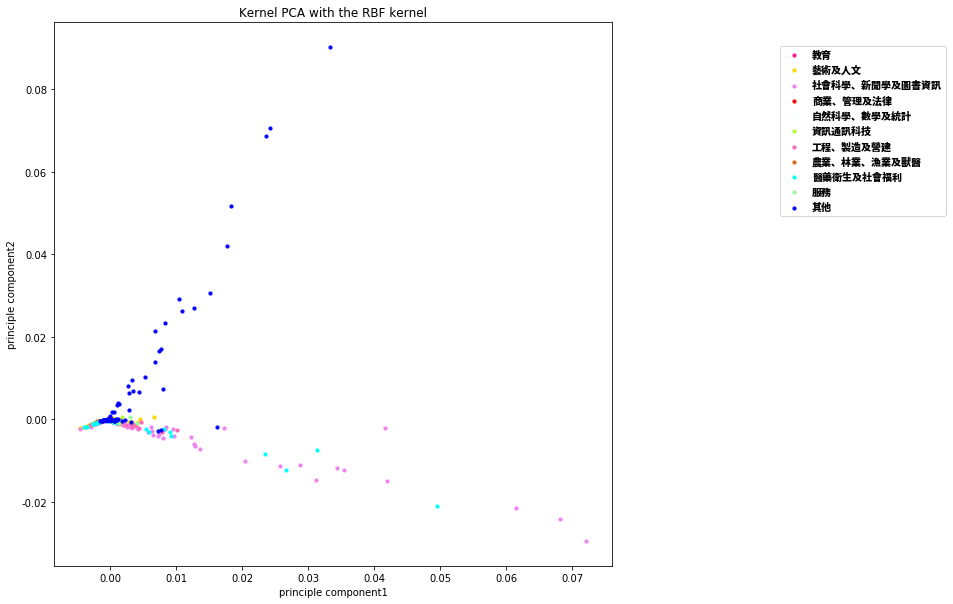

In [514]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(kpca_reduce[xs,0], kpca_reduce[xs,1], c = color[c], s = 10)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("Kernel PCA with the RBF kernel")

In [ ]:
kpca2 = KernelPCA(n_components = 2, kernel = 'cosine')
kpca2_reduce = kpca2.fit_transform(matrix)

Text(0.5, 1.0, 'Kernel PCA with the Cosine kernel')

<Figure size 432x288 with 0 Axes>

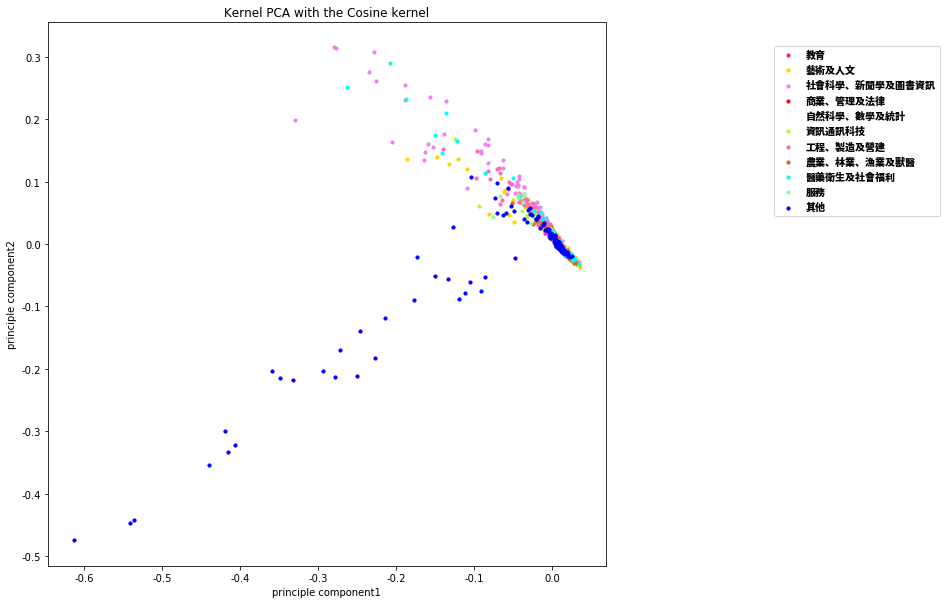

In [515]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(kpca2_reduce[xs,0], kpca2_reduce[xs,1], c = color[c], s = 10)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("Kernel PCA with the Cosine kernel")

#### Explanation:

Kernel PCA with the Cosine kernel視覺化的結果比RBF的好，因為他在(0,0)的地方稍微比較分散一點。可以分出社會科學、新聞學及圖書資訊；醫藥衛生及社會福利；其他等類別。

### Q2-5

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(metric = 'euclidean', random_state = 1)
tsne_reduce = tsne.fit_transform(matrix)

Text(0.5, 1.0, 'tsne with Euclidian metric')

<Figure size 432x288 with 0 Axes>

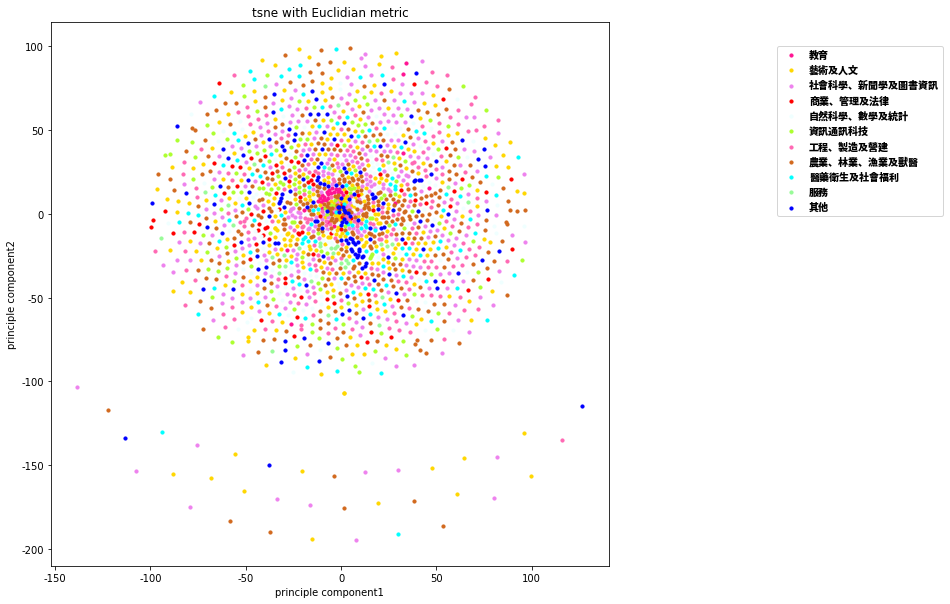

In [518]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(tsne_reduce[xs,0], tsne_reduce[xs,1], c = color[c], s = 10)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("tsne with Euclidian metric")

In [598]:
tsne2 = TSNE(metric = 'cosine', random_state = 1)
tsne2_reduce = tsne2.fit_transform(matrix)

Text(0.5, 1.0, 'tsne with Cosine metric')

<Figure size 432x288 with 0 Axes>

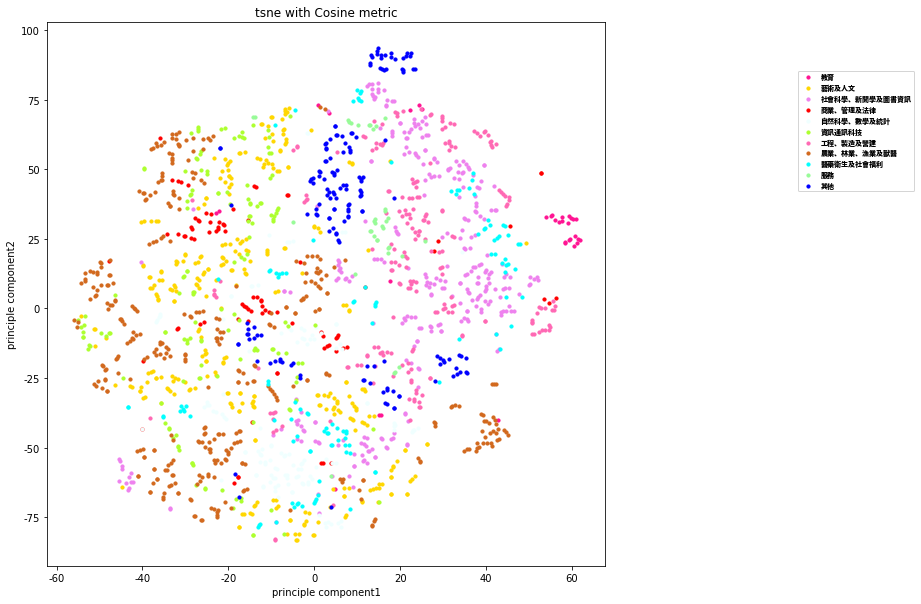

In [599]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(tsne2_reduce[xs,0], tsne2_reduce[xs,1], c = color[c], s = 10)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("tsne with Cosine metric")

In [600]:
tsne3 = TSNE(metric = 'jaccard', random_state = 1)
tsne3_reduce = tsne3.fit_transform(matrix)

Text(0.5, 1.0, 'tsne with Jaccard metric')

<Figure size 432x288 with 0 Axes>

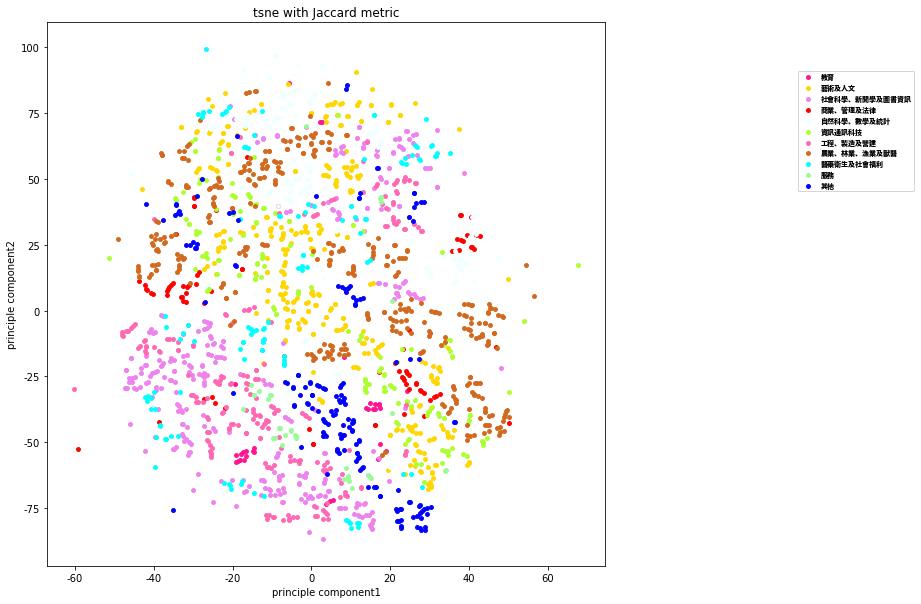

In [602]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(10,10))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(tsne3_reduce[xs,0], tsne3_reduce[xs,1], c = color[c], s = 15)
ax.set_xlabel("principle component1")
ax.set_ylabel("principle component2")
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("tsne with Jaccard metric")

#### Explanation:

tsne with Euclidian metric無法有效分群，Cosine metric, Jaccard metric則可以將類別做出區分，所以在這些資料上，使用Jaccard或Cosine算距離會有不錯的視覺化效果。

## Q3

In [546]:
def getDepNameAbbr(id):
    name = uname[uname.department_id == id]['school_name_abbr'].values + uname[uname.department_id == id]['department_name_abbr'].values
    return name[0]

<Figure size 432x288 with 0 Axes>

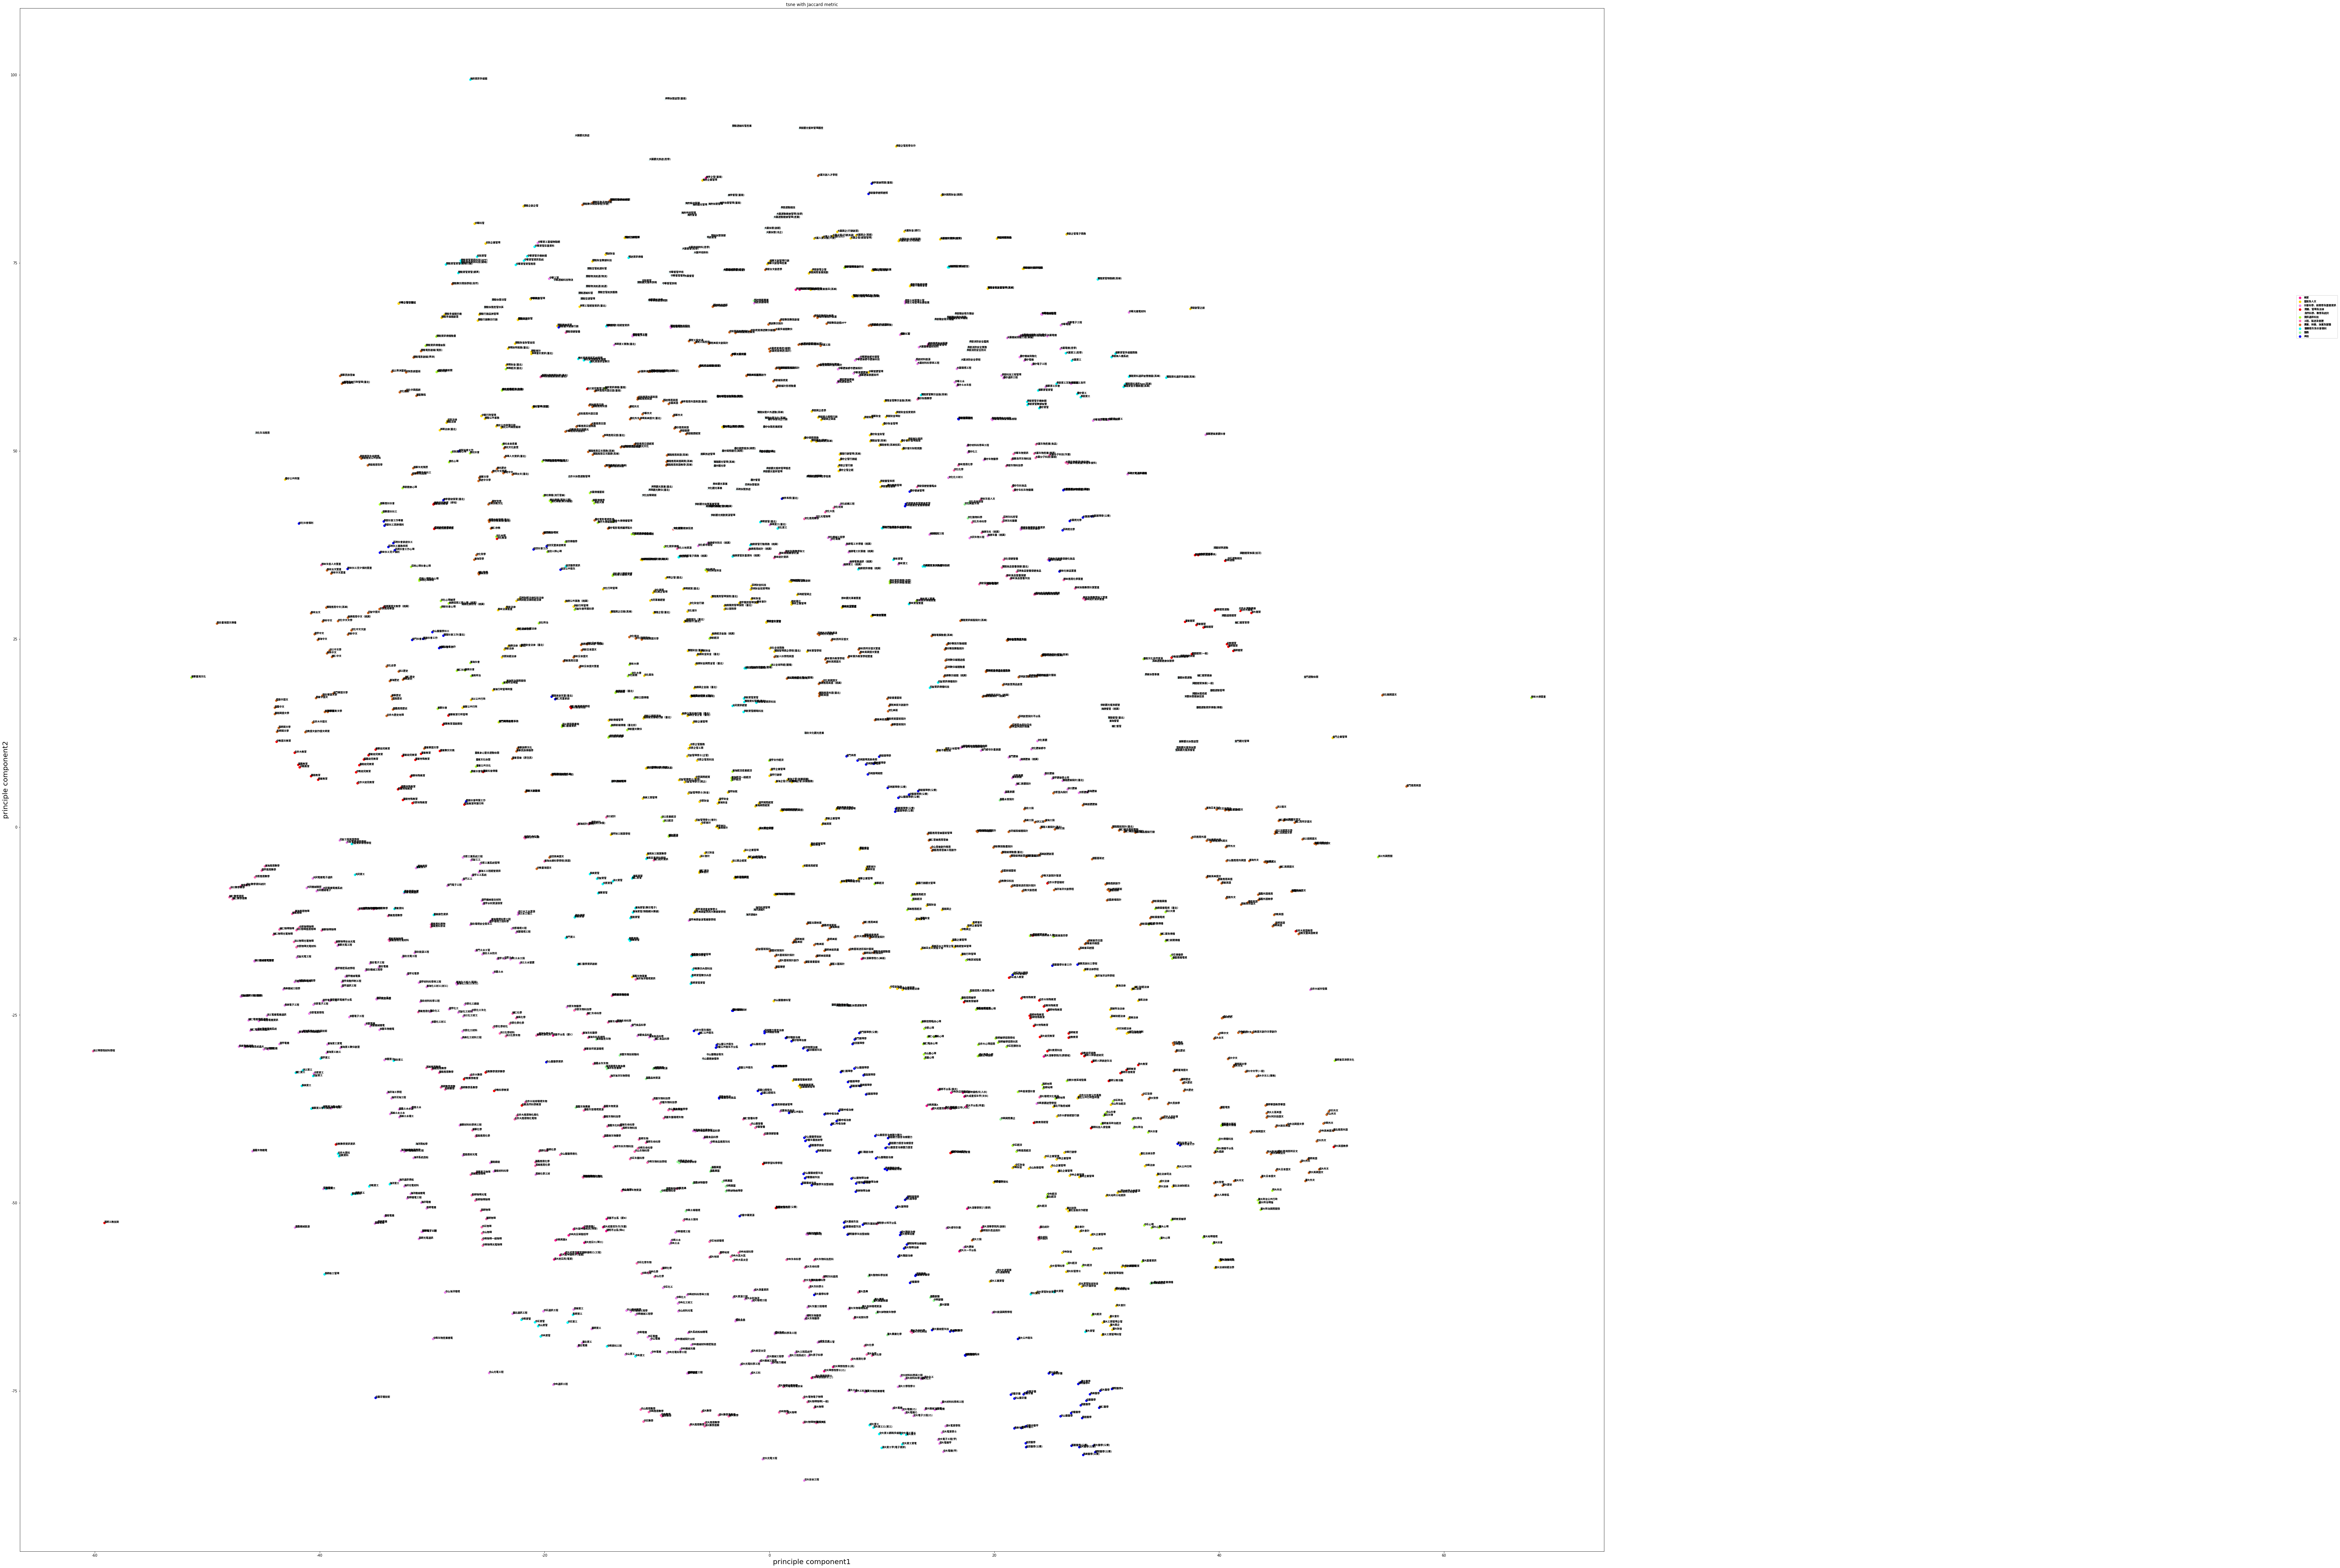

In [604]:
plt.clf()
fig , ax = plt.subplots(1, figsize=(80,80))
for c in np.unique(cate):
    xs = np.where(cate == c)
    ax.scatter(tsne3_reduce[xs,0], tsne3_reduce[xs,1], c = color[c], s = 35)
for i in range(matrix.shape[0]):
    ax.annotate(getDepNameAbbr(matrix.index[i]), xy=(tsne3_reduce[i,0], tsne3_reduce[i,1]), fontproperties = myfont, size=7)
ax.set_xlabel("principle component1", size = 20)
ax.set_ylabel("principle component2", size = 20)
ax.legend(color, prop = myfont, loc = 'center', bbox_to_anchor=(1.45, 0.8))
ax.set_title("tsne with Jaccard metric")
plt.savefig('test.png', bbox_inches="tight")